<a href="https://colab.research.google.com/github/ricacero/Datascience300/blob/main/taller2200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from google.colab import drive
import pandas as pd
import numpy as np
import os
import time
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/Bootcamp semana 6'

/content/gdrive/MyDrive/Bootcamp semana 6


In [3]:
%%time
dat = pd.read_csv('YENALDOLLAR.csv',sep=";")

CPU times: user 8.06 ms, sys: 973 µs, total: 9.03 ms
Wall time: 210 ms


In [4]:
print(dat.keys())

Index(['FECHA', 'JPUS', 'TASAINF'], dtype='object')


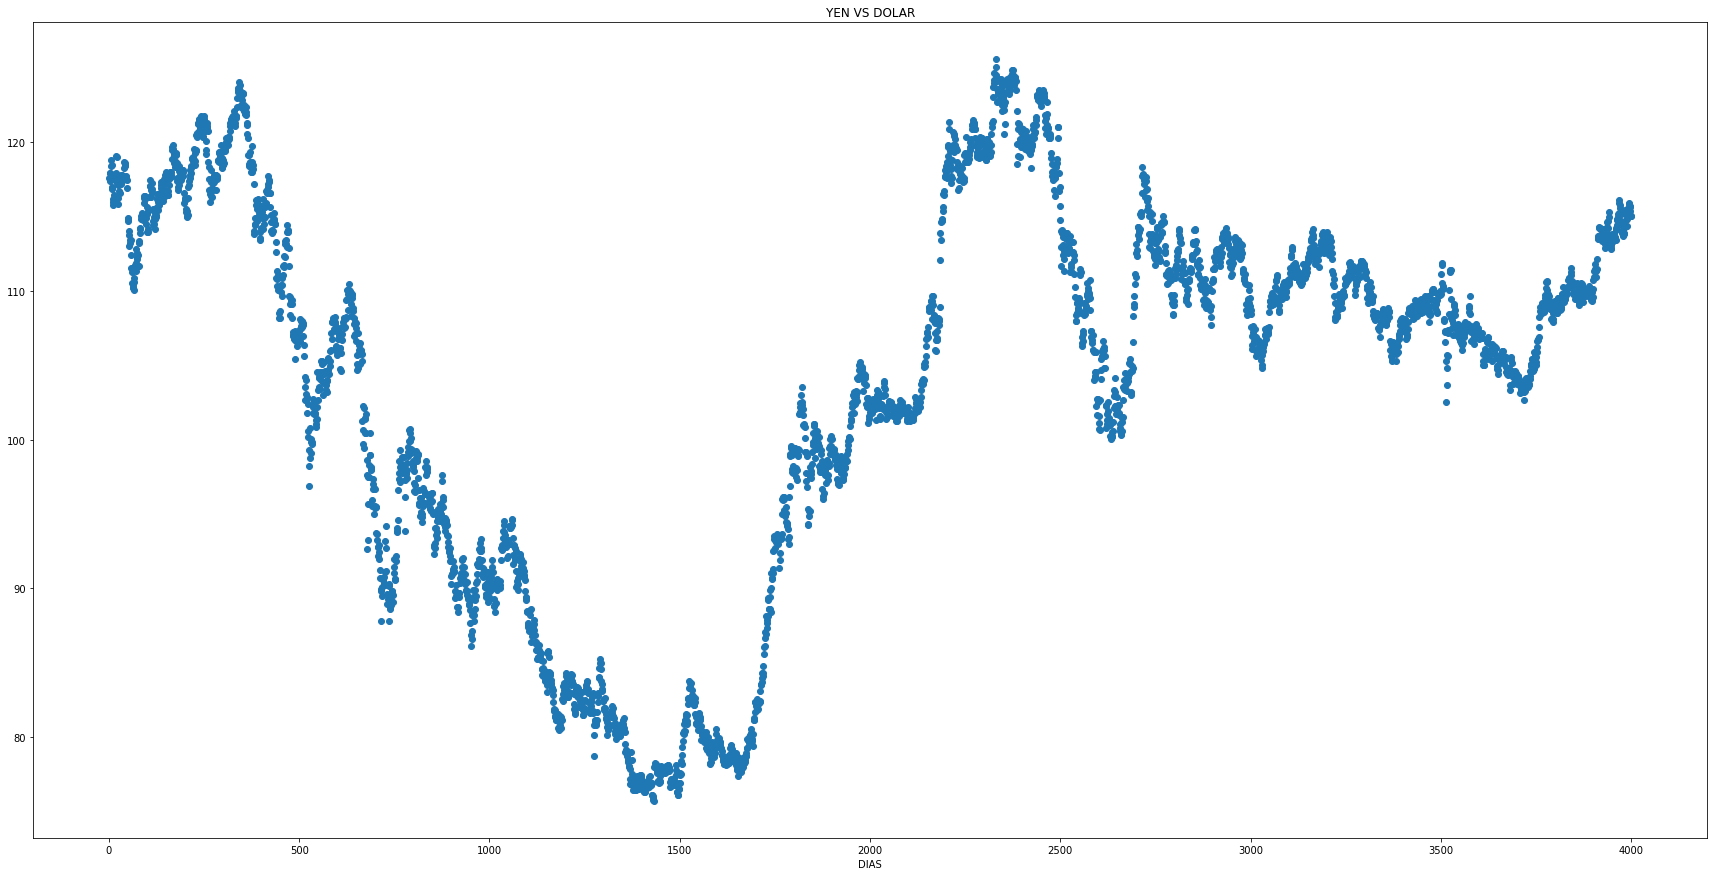

In [5]:
y = dat['JPUS'].values #datos originales del yen contra el dolar
X=dat['FECHA']#datos de fecha del 1 al 4000
fig,ax= plt.subplots(figsize=(30,15)) #graficar datos originales
#ax.set_ylim(bottom = 0, top=800)#limites de axis
ax.set_title('YEN VS DOLAR')#Titulos
ax.set_xlabel('DIAS')
#ax.set_ylabel('YEN AL DOLAR')
#ax.set_xlim(left = 0, right = 100
#ax.set_ylim(bottom = 1, top = 6)
ax.scatter(X,y) #dibujamos X y y


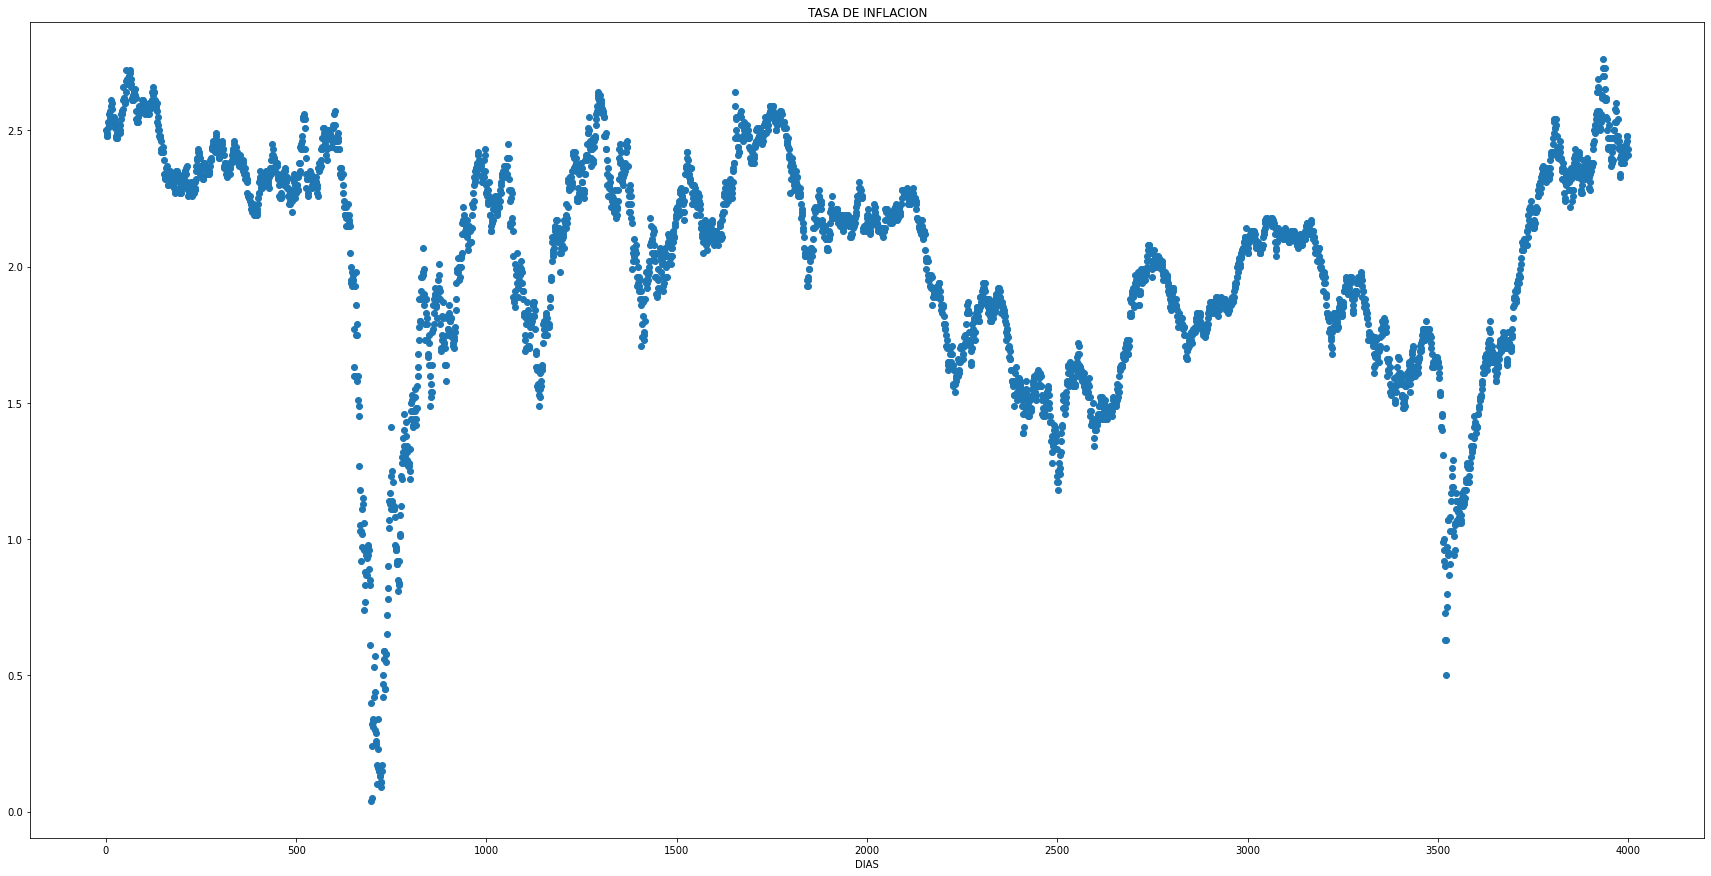

In [6]:

y = dat['TASAINF'].values #datos de la inflacion 
X=dat['FECHA']
fig,ax= plt.subplots(figsize=(30,15))
#ax.set_ylim(bottom = 0, top=800)#limites de axis
ax.set_title('TASA DE INFLACION')#Titulos
ax.set_xlabel('DIAS')
#ax.set_ylabel('YEN AL DOLAR')
#ax.set_xlim(left = 0, right = 100
#ax.set_ylim(bottom = 1, top = 6)
ax.scatter(X,y) #dibujamos X y y

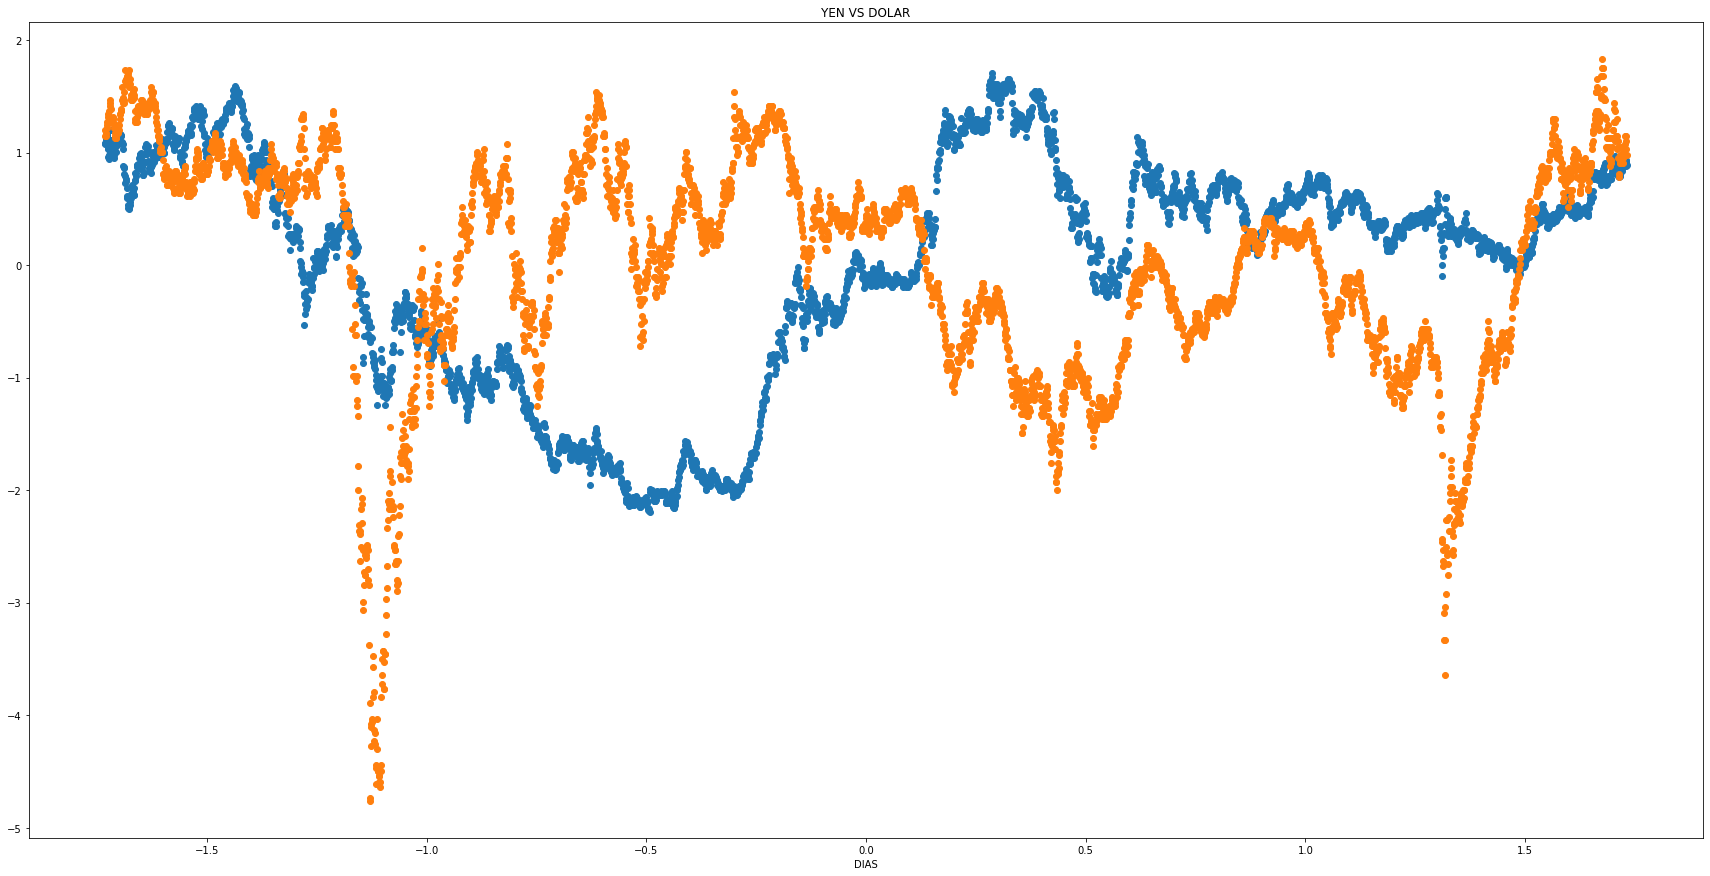

In [7]:
def normalize(x):               
    # it can also be done by using the scypy (stats) zscore
    mean = np.mean(x)#media
    sdeviation = np.std(x)
    y = (x-mean)/sdeviation
    return y


y = dat['JPUS'].values
y=normalize(y)
X=dat['FECHA']
X=normalize(X)
z=dat['TASAINF'].values
z=normalize(z)
fig,ax= plt.subplots(figsize=(30,15))
#ax.set_ylim(bottom = 0, top=800)#limites de axis
ax.set_title('YEN VS DOLAR')#Titulos
ax.set_xlabel('DIAS')
#ax.set_ylabel('YEN AL DOLAR')
#ax.set_xlim(left = 0, right = 100
#ax.set_ylim(bottom = 1, top = 6)
ax.scatter(X,y) #dibujamos X y y
ax.scatter(X,z) #dibujamos X y y

In [8]:
from sklearn import linear_model

Xaux=[] #vector de rangos en X
r=20 #cada cuantos datos aplico la regresion
w = dat['JPUS'].values #valores del yen vs el dolar
X=dat['FECHA'][:, np.newaxis] #valores de fecha en este caso de 0 a 4000
cord = [] #vector que guarda los valores de w cada rango para entrenar 
d=[]#vector que guarda los valores de X para entrenar
slope1=[] #vector que guarda los interceptos y las pendientes del rango seleccionado r
for i in range(0,len(w),r): #itero en la cantidad de datos en este caso w cada r  veces.
#ejemplo empiezo i=0, termina i=3999 cada 40 posiciones
  if cord!=[]:
   #print(cord)
   #print(d)
   ridge = linear_model.Ridge(alpha=0.001)#aplico modelo ridge
   ridge.fit(d, cord)#entreno ridge
   #print("Slope: "+str(ridge.coef_)+", intercept:"+str(ridge.intercept_))
   slope1.append([ridge.coef_[0][0],ridge.intercept_[0]])#lleno vector con pendiente e intercepto
   Xaux.append(i)#lleno vector de rangos X con la iteracion de acuerdo al r seleccionado
   #print(slope1)
   
   cord = []
   d=[]
  for p in range(i,i+r):#iteracion que arranca en el rango anterior y termina en el rango sumado el mismo ejemplo i=40 termina  en i=80 
    a=w[p]
    cord.append([a])#lleno vector cord con datos de w de acuerdo al rango seleccionado
    d.append(X[p]) #lleno vector d con los valores de fecha cada rango seleccionado ejemplo [0,40,80...]
#print(cord)
#print(d)
#aplico una vez mas el modelo y lleno los vectores ya que el for no me llena el ultimo dato incluido en los vectores de d y cord   
ridge = linear_model.Ridge(alpha=0.001)
ridge.fit(d, cord)
#print("Slope: "+str(ridge.coef_)+", intercept:"+str(ridge.intercept_))
slope1.append([ridge.coef_[0][0],ridge.intercept_[0]])
Xaux.append(4000) #lleno con el ultimo dato el vector de rangos 
#print(Xaux[:-1])
print(Xaux)
print(slope1)
len(slope1)



[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020, 2040, 2060, 2080, 2100, 2120, 2140, 2160, 2180, 2200, 2220, 2240, 2260, 2280, 2300, 2320, 2340, 2360, 2380, 2400, 2420, 2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600, 2620, 2640, 2660, 2680, 2700, 2720, 2740, 2760, 2780, 2800, 2820, 2840, 2860, 2880, 2900, 2920, 2940, 2960, 2980, 3000, 3020, 3040, 3060, 3080, 3100, 3120, 3140, 3160, 3180, 3200, 3220, 3240, 3260, 3280, 3300, 3320, 3340, 3360, 3380, 3400, 3420, 3440, 3460, 3480, 3500, 35

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


200

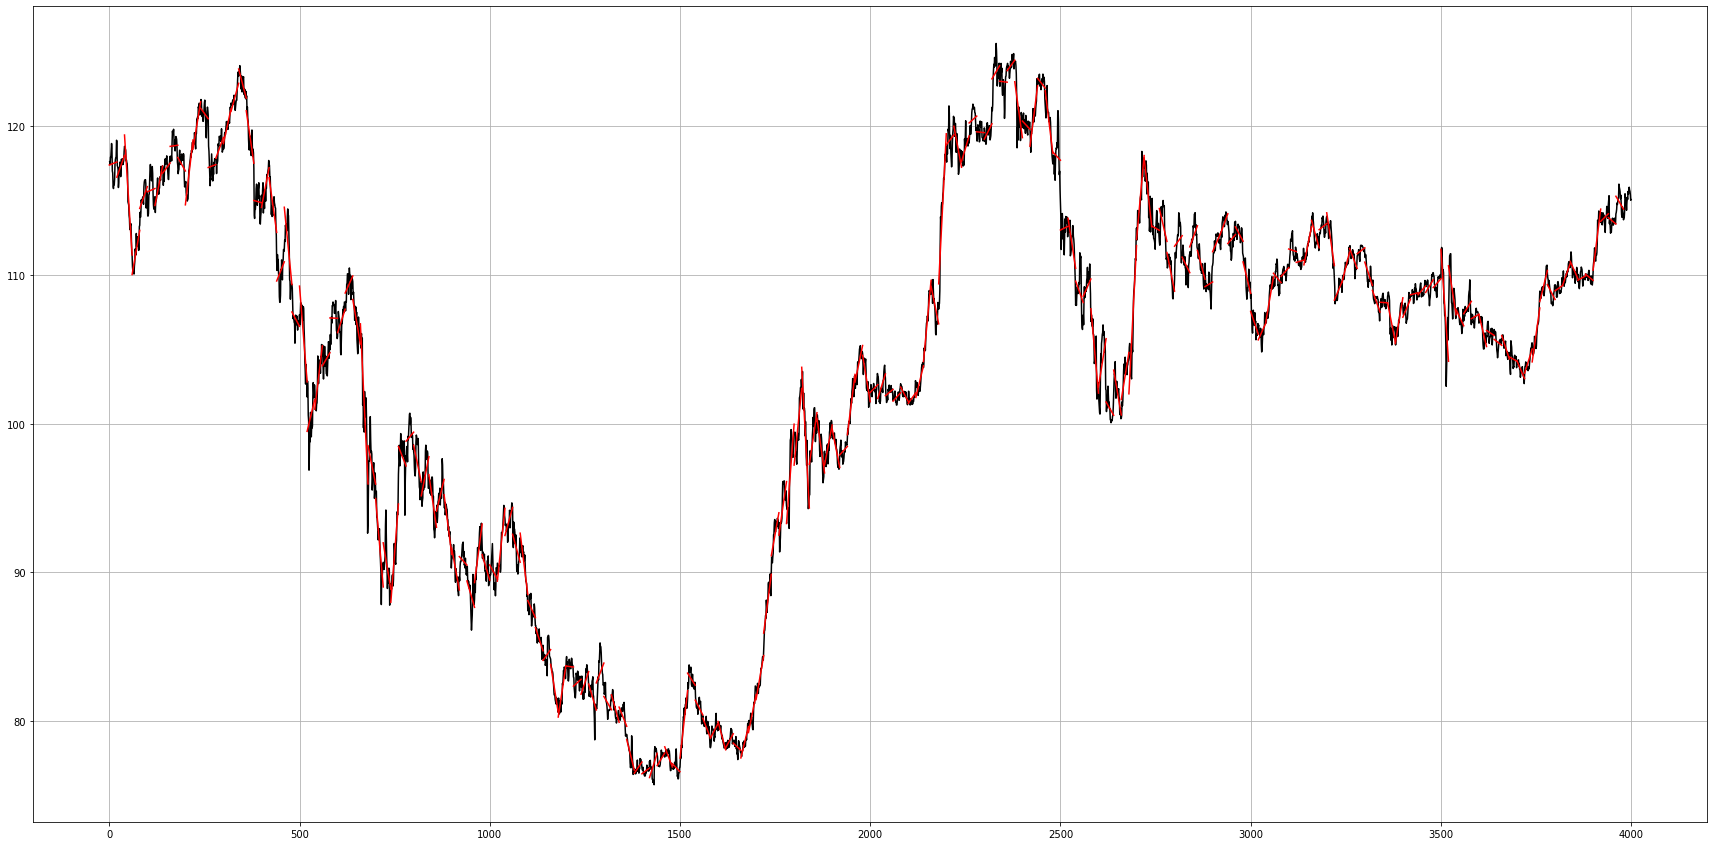

In [9]:
import numpy as np
import matplotlib.pyplot as plt

y = dat['JPUS'].values
X=dat['FECHA']#datos de fecha del 1 al 4000
fig,axs= plt.subplots(figsize=(30,15))
axs.plot(X,y,c='k') #graficamos valores originales

for i in range(199):
  x1 = Xaux[i]-20 #se resta el valor de r en este caso 40 para que tome el valor de 0 en la primera iteracion
  x2 = Xaux[i+1]-20 
  param=slope1[i]
  m=param[0]
  b=param[1]
  y1 = (m*x1)+b
  y2 = (m*x2)+b
  axs.plot([x1,x2],[y1,y2],c='r')#graficamos pendientes e interceptos en la grafica original 
  plt.grid()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1]


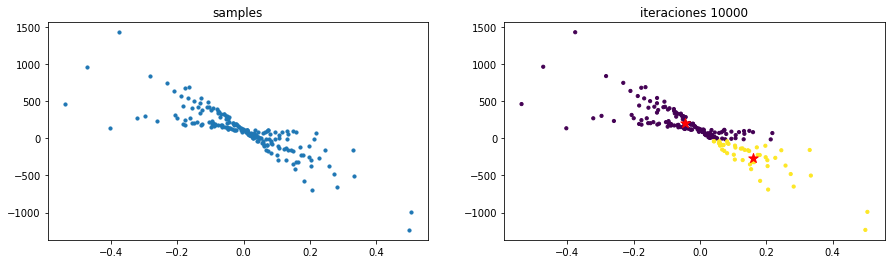

In [10]:
from sklearn import cluster
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

N_c = 2
color = ['y','m','k','r','b','c','g']


X= np.asarray(slope1)

'''dp_X=pd.DataFrame(X)
print(dp_X)
dp_X[0]=Xaux
dp_X[1]=colum
print(dp_X)
X=np.array(dp_X)'''
#X[0:]=colum
fig,axs = plt.subplots(1,2, figsize=(15,4))
#axs[0].scatter(Xaux,colum)
axs[0].scatter(X[:,0],X[:,1],s=10)
axs[0].set_title('samples')
for max_iter,fig in zip([10000],[1]):
  kmeans_clustering = KMeans(n_clusters=N_c, max_iter= max_iter, init='random')
  clusters = kmeans_clustering.fit_predict(X)
  print(clusters)
  axs[fig].set_title('iteraciones '+str(max_iter))
  axs[fig].scatter(X[:,0],X[:,1],c=clusters,s=10)
  clusters_center=kmeans_clustering.cluster_centers_
  axs[fig].scatter(clusters_center[:,0],clusters_center[:,1], marker='*',c='r',s=100)

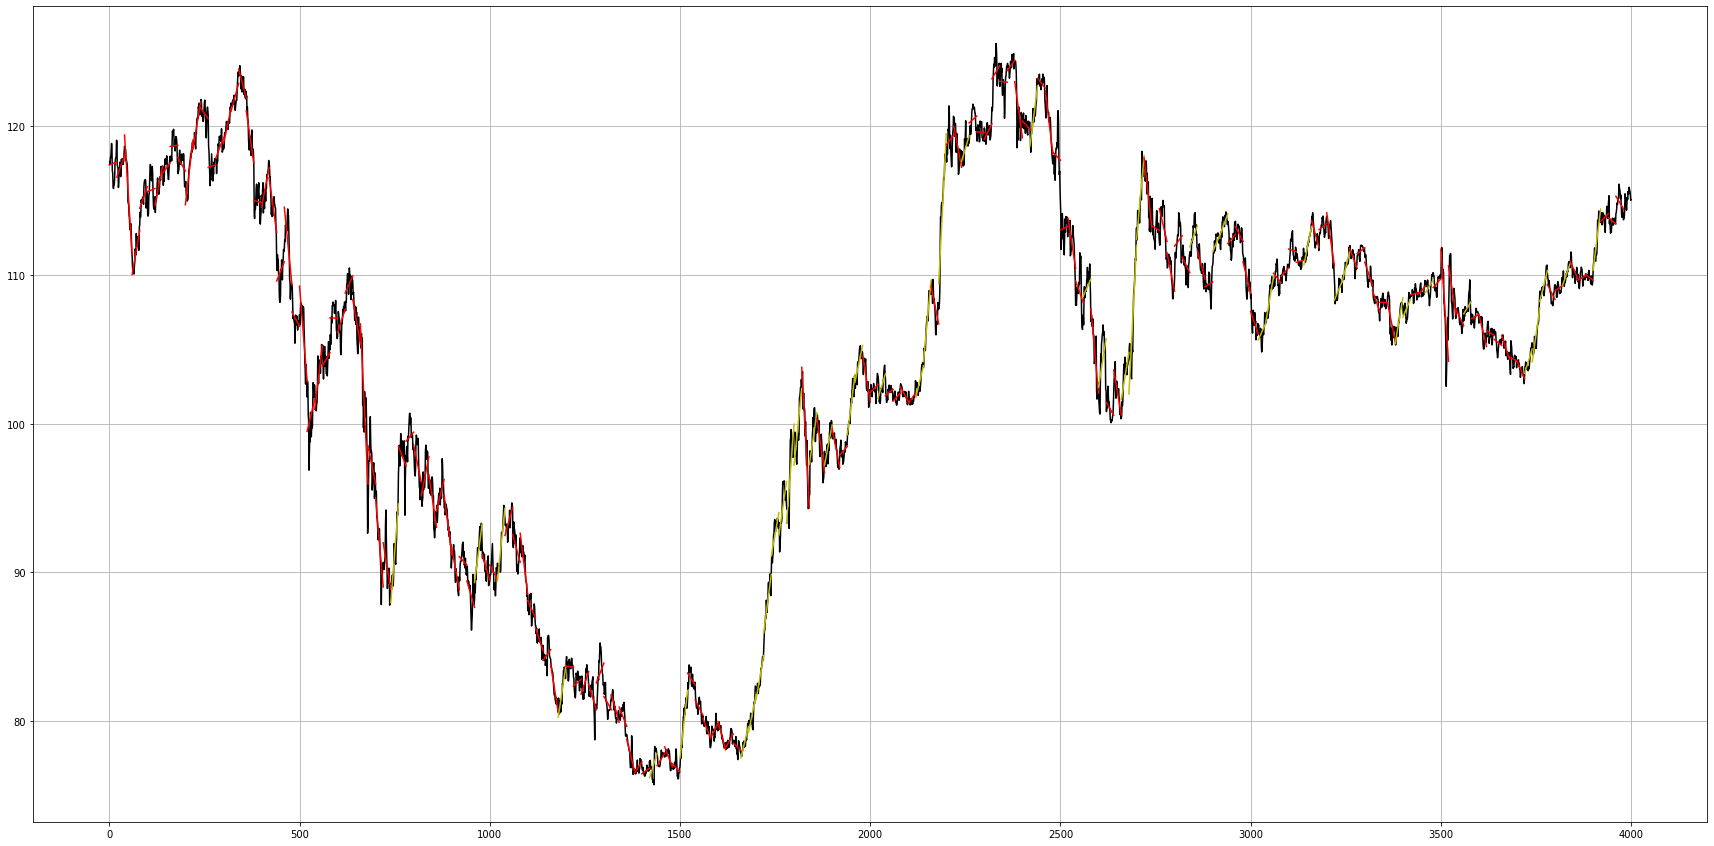

In [11]:
import numpy as np
import matplotlib.pyplot as plt

y = dat['JPUS'].values
X=dat['FECHA']#datos de fecha del 1 al 4000
fig,axs= plt.subplots(figsize=(30,15))
axs.plot(X,y,c='k') #graficamos valores originales

for i in range(199):
  x1 = Xaux[i]-20 #se resta el valor de r en este caso 40 para que tome el valor de 0 en la primera iteracion
  x2 = Xaux[i+1]-20 
  param=slope1[i]
  m=param[0]
  b=param[1]
  y1 = (m*x1)+b
  y2 = (m*x2)+b
  if clusters[i]==0:
    c='r'
  elif clusters[i]==1:
    c='y'
  axs.plot([x1,x2],[y1,y2],c=c)#graficamos pendientes e interceptos en la grafica original 
  plt.grid()



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1]


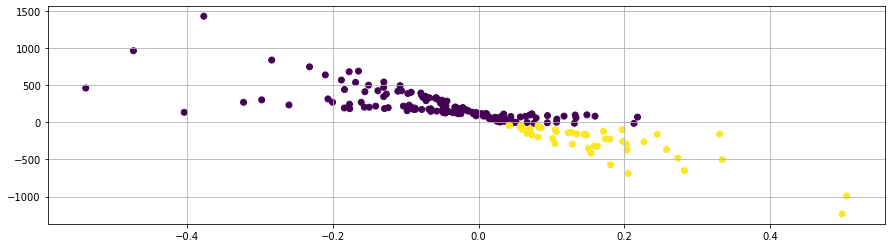

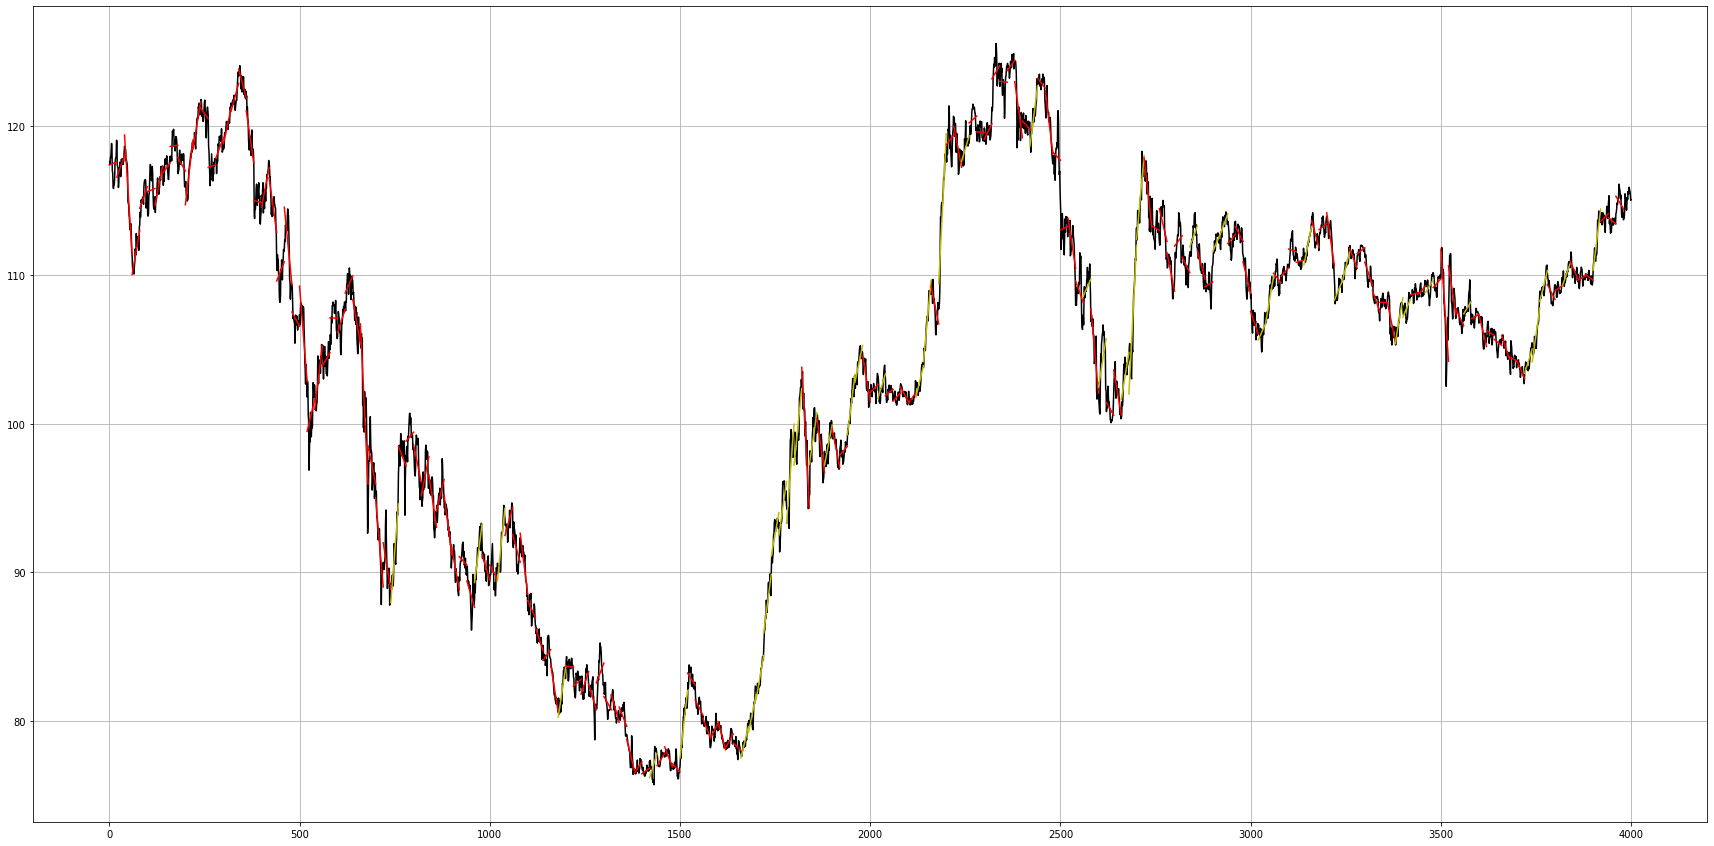

In [12]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


fig,axs = plt.subplots(figsize=(15,4))

X= np.asarray(slope1)
#X=np.array(dp_X)
agl_c = AgglomerativeClustering(n_clusters= 2)
clusters = agl_c.fit_predict(X)
print(clusters)
axs.scatter(X[:,0],X[:,1], c = clusters)
plt.grid()
import numpy as np
import matplotlib.pyplot as plt

y = dat['JPUS'].values
X=dat['FECHA']#datos de fecha del 1 al 4000
fig,axs= plt.subplots(figsize=(30,15))
axs.plot(X,y,c='k') #graficamos valores originales

for i in range(199):
  x1 = Xaux[i]-20 #se resta el valor de r en este caso 40 para que tome el valor de 0 en la primera iteracion
  x2 = Xaux[i+1]-20
  param=slope1[i]
  m=param[0]
  b=param[1]
  y1 = (m*x1)+b
  y2 = (m*x2)+b
  if clusters[i]==0:
    c='r'
  elif clusters[i]==1:
    c='y'
  axs.plot([x1,x2],[y1,y2],c=c)#graficamos pendientes e interceptos en la grafica original 
  plt.grid()

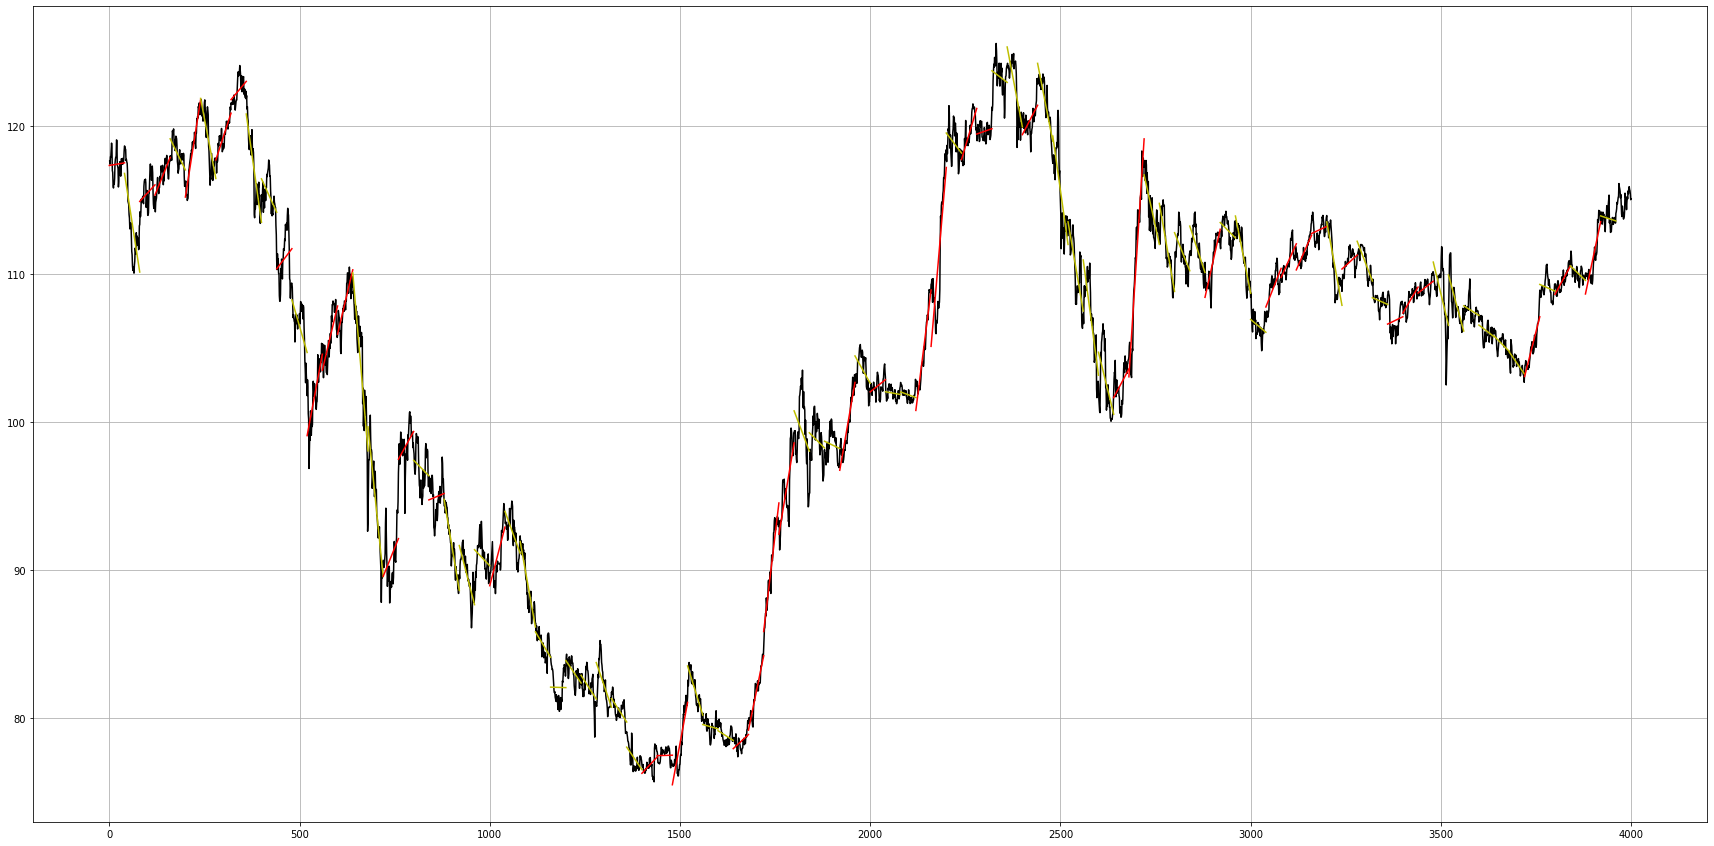

In [ ]:

y = dat['JPUS'].values
X=dat['FECHA']#datos de fecha del 1 al 4000
fig,axs= plt.subplots(figsize=(30,15))
axs.plot(X,y,c='k') #graficamos valores originales

for i in range(99):
  x1 = Xaux[i]-40 #se resta el valor de r en este caso 40 para que tome el valor de 0 en la primera iteracion
  x2 = Xaux[i+1]-40 
  param=slope1[i]
  m=param[0]
  b=param[1]
  y1 = (m*x1)+b
  y2 = (m*x2)+b
  if m>=0:
    c='r'
  elif m<0:
    c='y'
  axs.plot([x1,x2],[y1,y2],c=c)#graficamos pendientes e interceptos en la grafica original 
  plt.grid()